In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HW2_ellipse.csv')

Text(0.5, 1.0, 'HW2 Ellipse Data: Scatter Plot')

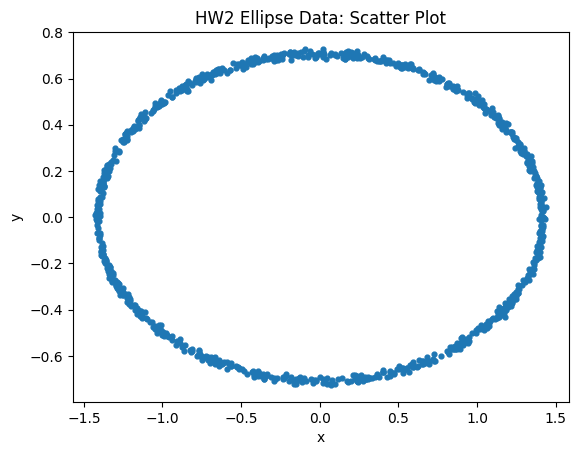

In [7]:
x, y = df.iloc[:,0].to_numpy(), df.iloc[:,1].to_numpy()
plt.figure()
plt.scatter(x, y, s=12)
plt.xlabel('x')
plt.ylabel('y')
plt.title('HW2 Ellipse Data: Scatter Plot')

In [8]:
x = df.iloc[:, 0].to_numpy()
y = df.iloc[:, 1].to_numpy()
N = x.shape[0]

A = np.column_stack([x**2, y**2])
b = np.ones(N)

def f(a):
    r = A @ a - b
    return r @ r

def grad(a):
    return 2 * (A.T @ (A @ a - b))

AtA = A.T @ A
step = 1.0 / (2.0 * np.linalg.norm(AtA, 2))

a = np.zeros(2)
tolerance = 1e-8
max_iter = 50000

f_prev = f(a)
for t in range(max_iter):
    g = grad(a)
    if np.linalg.norm(g) <= tolerance:
        break
    a = a - step * g
    f_curr = f(a)
    if abs(f_curr - f_prev) <= 1e-12 * max(1.0, f_prev):
        break
    f_prev = f_curr


In [10]:
print("iterations:", t+1)
print("a* =", a)
print("f(a*) =", f(a))

iterations: 264
a* = [0.50012202 1.99466478]
f(a*) = 0.46407664247554153
